# Preparation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Tensorflow + Keras
import tensorflow as tf
from tensorflow import keras

# Import model keras beserta hidden layers
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

#Sklearn lib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#List dari setiap path
imagepaths = []

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/HandGestureRecognition/leapGestRecog'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        #print(os.path.join(dirname, filename))
        if path.endswith("png"):
            imagepaths.append(path)

print(len(imagepaths))

40010


In [3]:
#Membuat function untuk menampilkan plot gambar dari path yang dipilih

def img_plot(img_path):
    img = cv2.imread(img_path)
    #convert to RGB space
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #check the shape of the image
    print("Shape of the image is ", img_rgb.shape)
    #Display the image
    plt.grid(False)
    plt.imshow(img_rgb)
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.title("Image " + img_path)

Shape of the image is  (240, 640)


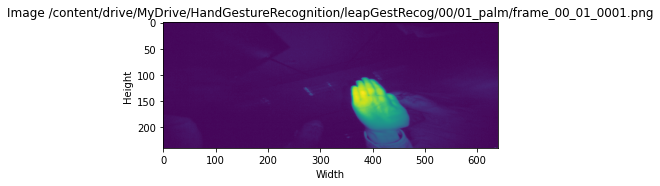

In [4]:
#Plotting dataset gambar pertama
img_plot(imagepaths[0])

# Training (Preprocessing + Modelfit)

In [5]:
#### Membuat training set dan label set ####
# X for image data
X = []
# y for the labels
y = []

#Mengload gambar kedalam var X dengan melakukan konversi dan resize gambar
#Resize diperlukan dalam upaya meningkatkan performa training model agar lebih cepat dan tidak memakan banyak RAM
for path in imagepaths[:19999]:
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (128,128))
    X.append(img)  
    #Getting the labels from the image path
    category = path.split("/")[7]
    #print(category)
    label = int(category.split("_")[0][1])
    #print(label)
    y.append(label)

#print(label)
#Mengubah X & y ke numpy arrays
X = np.array(X)
X = X.reshape(len(imagepaths[:19999]), 128, 128, 1)
y = np.array(y)

print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))

print(y[0], imagepaths[0]) #To debug

Images loaded:  19999
Labels loaded:  19999
1 /content/drive/MyDrive/HandGestureRecognition/leapGestRecog/00/01_palm/frame_00_01_0001.png


In [6]:
# split size dari train dan test
pecah = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = pecah, random_state = 42)

In [7]:
# Membuat CNN Sequential Model
model = Sequential()
model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
#Model configuration
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=2, 
         validation_data=(X_test, y_test))

Epoch 1/5
219/219 - 538s - loss: 0.6361 - accuracy: 0.8613 - val_loss: 0.0142 - val_accuracy: 0.9958 - 538s/epoch - 2s/step
Epoch 2/5
219/219 - 531s - loss: 0.0183 - accuracy: 0.9945 - val_loss: 0.0059 - val_accuracy: 0.9990 - 531s/epoch - 2s/step
Epoch 3/5
219/219 - 526s - loss: 0.0224 - accuracy: 0.9939 - val_loss: 0.0028 - val_accuracy: 0.9997 - 526s/epoch - 2s/step
Epoch 4/5
219/219 - 523s - loss: 0.0144 - accuracy: 0.9956 - val_loss: 0.0022 - val_accuracy: 0.9992 - 523s/epoch - 2s/step
Epoch 5/5
219/219 - 528s - loss: 0.0074 - accuracy: 0.9979 - val_loss: 0.0165 - val_accuracy: 0.9960 - 528s/epoch - 2s/step


In [10]:
model.save('gesture_hasiltrain.h5')

# Testing

In [11]:
#menghitung loss dan akurasi hasil training

tLoss, tAccuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(tAccuracy*100))

188/188 [==============================] - 58s 306ms/step - loss: 0.0165 - accuracy: 0.9960
Test accuracy: 99.60%


In [12]:
# Mencoba prediksi label kepada test dataset
prediction = model.predict(X_test)

188/188 [==============================] - 55s 291ms/step


In [13]:
#Membandingkan data aktual dengan data test
# Idealnya keduanya / prediction[0] and y_test[0] harusnya sama
np.argmax(prediction[0]), y_test[0]

(7, 7)

In [14]:
# Function to plot images and labels for validation purposes
def validate_gestures(predictions_array, true_label_array, img_array):
  # Array for pretty printing and then figure size
  class_names = ["down", "palm", "l", "fist", "fist_moved", "thumb", "index", "ok", "palm_moved", "c"] 
  plt.figure(figsize=(15,5))
  
  for i in range(1, 10):
    # Just assigning variables
    prediction = predictions_array[i]
    true_label = true_label_array[i]
    img = img_array[i]
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    
    # Plot in a good way
    plt.subplot(3,3,i)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction) # Get index of the predicted label from prediction
    
    # Change color of title based on good prediction or not
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("Predicted: {} {:2.0f}% (Actual: {})".format(class_names[predicted_label],
                                  100*np.max(prediction),
                                  class_names[true_label]),
                                  color=color)
  plt.show()

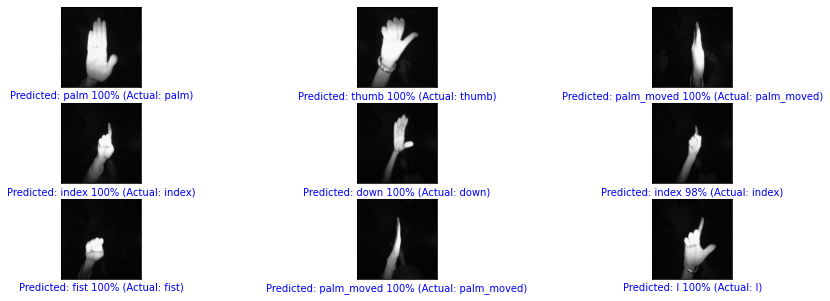

In [15]:
# Plot testing based on predictions and their actual values
validate_gestures(prediction, y_test, X_test)

In [16]:
#Transform predictions into 1D array 
y_pred = np.argmax(prediction, axis=1)

In [17]:
#Create a Confusion Matrix for Evaluation
# H = Horizontal
# V = Vertical
pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=["Predicted Thumb Down", "Predicted Palm (H)", "Predicted L", "Predicted Fist (H)", "Predicted Fist (V)", "Predicted Thumbs up", "Predicted Index", "Predicted OK", "Predicted Palm (V)", "Predicted C"],
             index=["Actual Thumb Down", "Actual Palm (H)", "Actual L", "Actual Fist (H)", "Actual Fist (V)", "Actual Thumbs up", "Actual Index", "Actual OK", "Actual Palm (V)", "Actual C"])

,Predicted Thumb Down,Predicted Palm (H),Predicted L,Predicted Fist (H),Predicted Fist (V),Predicted Thumbs up,Predicted Index,Predicted OK,Predicted Palm (V),Predicted C
Actual Thumb Down,561,0,0,0,0,0,0,0,0,0
Actual Palm (H),0,608,0,0,0,0,0,0,0,0
Actual L,0,1,586,3,0,0,1,0,0,0
Actual Fist (H),0,0,0,605,2,0,0,0,0,0
Actual Fist (V),0,0,0,11,575,0,0,0,0,0
Actual Thumbs up,0,0,0,3,0,592,0,0,0,0
Actual Index,0,0,0,2,0,0,619,0,0,0
Actual OK,0,0,0,0,0,0,0,615,0,0
Actual Palm (V),0,0,0,0,0,0,0,0,629,0
Actual C,0,0,0,1,0,0,0,0,0,586
